# 피마 인디언 당뇨병 예측 실습 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 1. EDA

In [21]:
df = pd.read_csv('c:/my_web/machine_lecture/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.shape

(768, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 전처리 : 0값 처리

In [25]:
data = df.iloc[:, :-1]
target = df.iloc[:, -1]
data.replace(0, df.mean(), inplace=True)

In [26]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## 3. 데이터 분류

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.2,
                                                    random_state=11,
                                                    stratify=target)


## 4. 모델생성, 평가

In [37]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
pred = lr.predict(X_test)
proba = lr.predict_proba(X_test)[:, 1]

def get_eval(y_test, pred=None, proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, proba)
    
    print('오차행렬')
    print(confusion)
    
    print('정확도:{0: .4f}, 정밀도:{1: .4f}, 재현율:{2: .4f}, F1:{3: .4f}, AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_eval(y_test, pred, proba) # 임계값 조정으로 재현율을 높일 필요가 있음

오차행렬
[[89 11]
 [24 30]]
정확도: 0.7727, 정밀도: 0.7317, 재현율: 0.5556, F1: 0.6316, AUC: 0.8370


c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


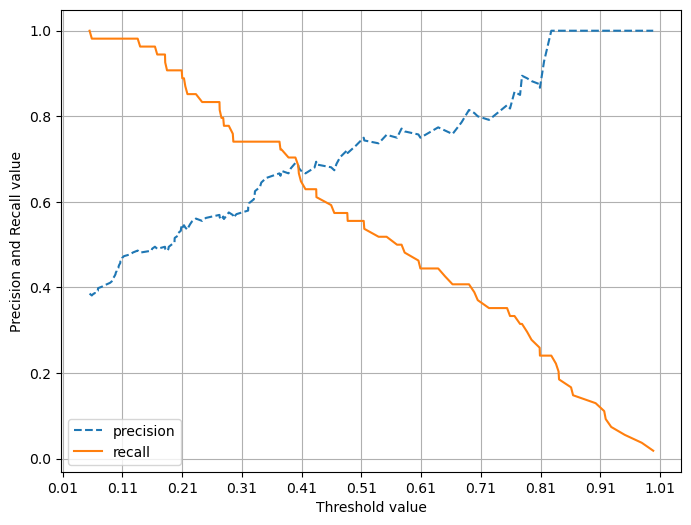

In [39]:
# 임계값 조정 plot

def curve_plot(y_test=None, proba=None) :
    # threshold ndarray와 이에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
    
    # X축 = thresholds로 y축 = 정밀도, 재현율로 각각 plot 수행 (정밀도 = 점선)
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    # thresholds 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, y축 labe과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
curve_plot(y_test, proba) # 적절한 threshold = 0.4 임을 알 수 있음  

# 스케일링 후 다시 예측해보기

In [60]:
df2 = pd.read_csv('c:/my_web/machine_lecture/diabetes.csv')
# df2.head()

data2 = df2.iloc[:, :-1]
target2 = df2.iloc[:, -1]
data2.replace(0, df2.mean(), inplace=True)
data3 = StandardScaler().fit_transform(data2)
data2.shape

(768, 8)

In [61]:
data3[:, 0].mean()

-8.789265611615822e-17

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data3, target2, test_size=0.2, random_state=11, stratify=target2)

In [63]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [64]:
type(X_test)

numpy.ndarray

In [65]:
lr = LogisticRegression()
model2 = lr.fit(X_train, y_train)
pred2 = model2.predict(X_test)
proba2 = model2.predict_proba(X_test)[:, 1]

get_eval(y_test, pred2, proba2) # AUC는 올라감 

오차행렬
[[89 11]
 [25 29]]
정확도: 0.7662, 정밀도: 0.7250, 재현율: 0.5370, F1: 0.6170, AUC: 0.8444


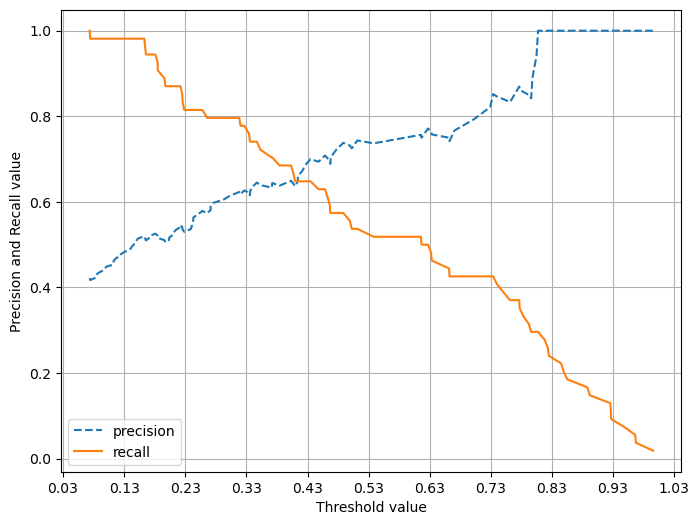

In [74]:
curve_plot(y_test, proba2)

In [72]:
# 분류결정 임계값을 변경하면서 성능 측정해보기

from sklearn.preprocessing import Binarizer

def get_eval_by_treshold(y_test, proba, thresholds) :
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom in thresholds :
        binarizer = Binarizer(threshold = custom).fit(proba)
        custom_predict = binarizer.transform(proba)
        # print('임계값 :', custom_predict)
        get_eval(y_test, custom_predict, proba)
        print()
        
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
proba = lr.predict_proba(X_test)
get_eval_by_treshold(y_test, proba[:, 1].reshape(-1,1), thresholds) # 0.3일 때 성능이 제일 좋음을 알 수 있다. 

오차행렬
[[73 27]
 [11 43]]
정확도: 0.7532, 정밀도: 0.6143, 재현율: 0.7963, F1: 0.6935, AUC: 0.8444

오차행렬
[[75 25]
 [13 41]]
정확도: 0.7532, 정밀도: 0.6212, 재현율: 0.7593, F1: 0.6833, AUC: 0.8444

오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8444

오차행렬
[[80 20]
 [17 37]]
정확도: 0.7597, 정밀도: 0.6491, 재현율: 0.6852, F1: 0.6667, AUC: 0.8444

오차행렬
[[83 17]
 [19 35]]
정확도: 0.7662, 정밀도: 0.6731, 재현율: 0.6481, F1: 0.6604, AUC: 0.8444

오차행렬
[[86 14]
 [20 34]]
정확도: 0.7792, 정밀도: 0.7083, 재현율: 0.6296, F1: 0.6667, AUC: 0.8444

오차행렬
[[89 11]
 [23 31]]
정확도: 0.7792, 정밀도: 0.7381, 재현율: 0.5741, F1: 0.6458, AUC: 0.8444

오차행렬
[[89 11]
 [25 29]]
정확도: 0.7662, 정밀도: 0.7250, 재현율: 0.5370, F1: 0.6170, AUC: 0.8444



In [73]:
# 임계값을 0.3으로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.3)
pred_03 = binarizer.fit_transform(proba[:, 1].reshape(-1,1))
get_eval(y_test, pred_03, proba[:, 1])

오차행렬
[[73 27]
 [11 43]]
정확도: 0.7532, 정밀도: 0.6143, 재현율: 0.7963, F1: 0.6935, AUC: 0.8444
